##Data Processing


In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import * 


%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import minmax_scale  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.lines import Line2D


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Added for Assignment
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture
from nltk.cluster.util import cosine_distance
from sklearn import preprocessing
import os


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/marcushe-afk/BDML/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)   
data.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Finding:** TotalCharges should be float, so there must be something wrong with the data 

In [ ]:
# check duplicate values
dupCount = data.shape[0] - data.drop_duplicates().shape[0]
print("We have %s columns of duplicate values" % dupCount)

We have 0 columns of duplicate values


In [ ]:
# check missing values
print (data.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


It seems like TotalCharges has non-numerical data. Let's find them

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data[data['TotalCharges'].isnull()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Except for TotalCharges, they have **SeniorCitizen, Dependents, tenure, and churn** in common. 

**Notice:** tenture=0 for all these 11 data. 

**Guess:** They don't have TotalCharges but have monthlyCharges because it is their first month of service.




Let's double check. If we are correct, all data with tenture=0 should have null totalCharges. 

In [ ]:
data[data['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Met our expectation. Their monthlyCharge should be their totalCharge. Let's solve the missing value. 

In [ ]:
data['TotalCharges']=data['TotalCharges'].fillna(data['MonthlyCharges'])  
data[data['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


##Data Analysis

In [ ]:
number = data["Churn"].value_counts()
churn_rate=number['Yes']/(number['Yes']+number['No'])
print("We have a churn rate of %.4f%%" % (100*churn_rate) )


We have a churn rate of 26.5370%


Check how some **categorical characteristics** impact Churn rate 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#select columns with data type of object, then mannually adjust the pool
cate_char=data.columns[data.dtypes=='object']
cate_char


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
# Drop customerID and Churn
cate_char=cate_char.delete([0,16])
cate_char

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
#Notice SeniorCitizen is also categorical characteristics
cate_char=cate_char.insert(1,'SeniorCitizen')
cate_char

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

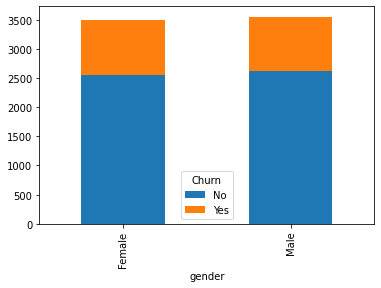

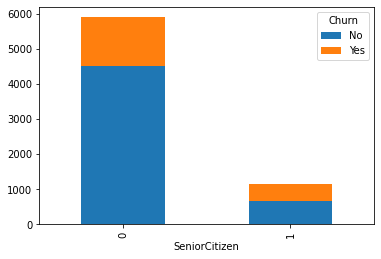

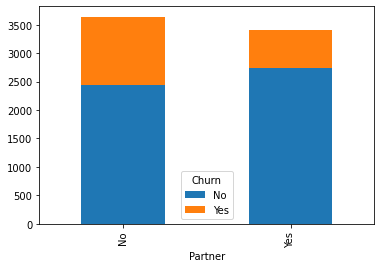

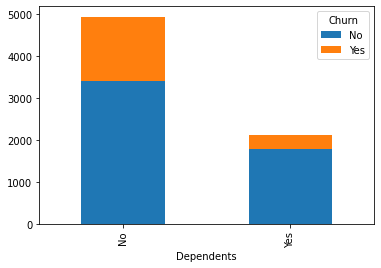

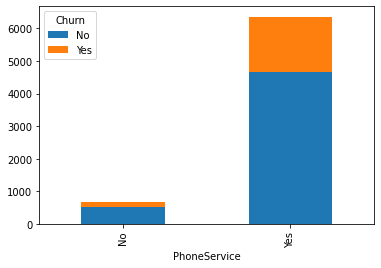

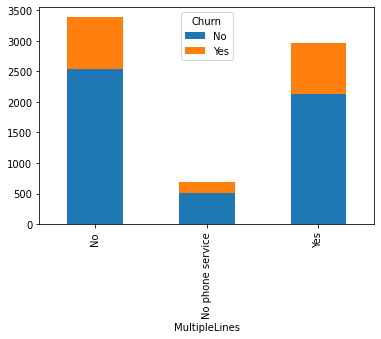

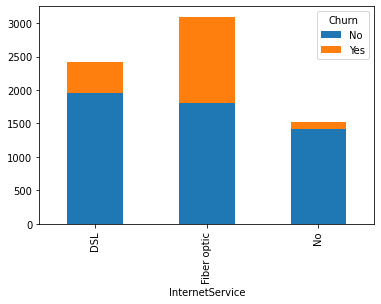

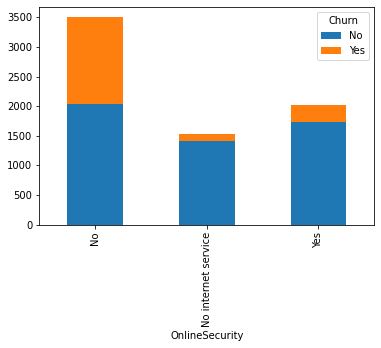

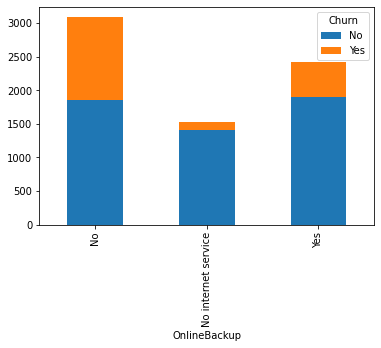

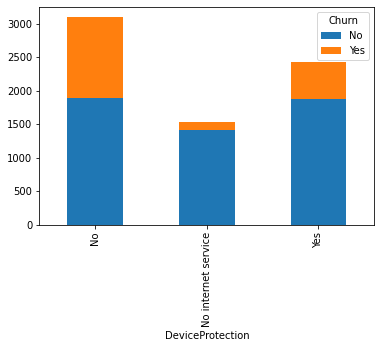

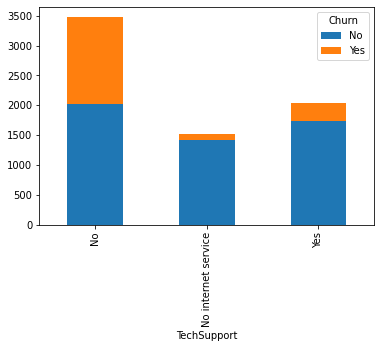

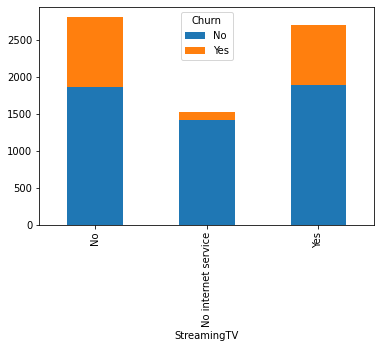

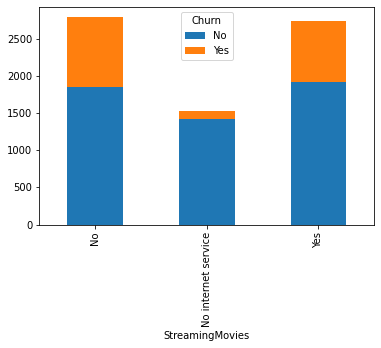

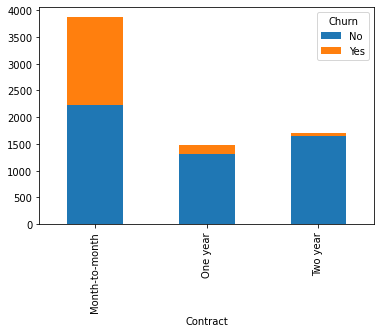

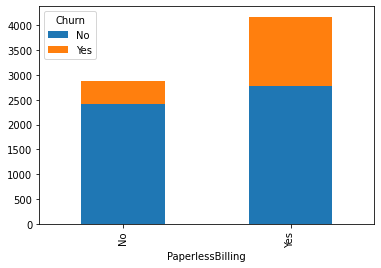

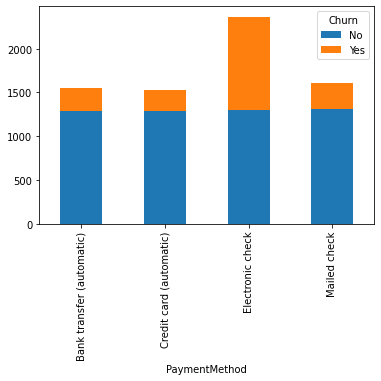

In [ ]:
for i in cate_char:
    cnt = pd.crosstab(data[i], data['Churn'])    
    cnt.plot.bar(stacked=True)    
    plt.show()

Except for Gender, **almost all other characteristics  have a significant impact** on Churn rate

**Finding:** 
1. From the plots, we notice that **senior citizens** have **higher** churn rate than non-senior citizens
2. clients **without partner** have  **higher** churn rate than those who have partners
3. clients **without dependents** have  **higher** churn rate than those who have dependents
4. clients with **paperless billing** have **higher** churn rate than those don't have
5. clients with **shorter** **contract period** have **higher** churn rate
6. clients make **payment** using **electronic check** have **higher** churn rate

It is hard to see the churn rate of the other characteristics. Let's make pie chart for them

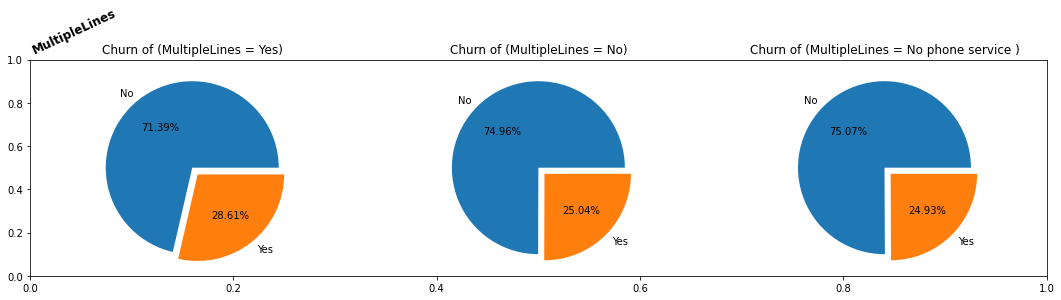

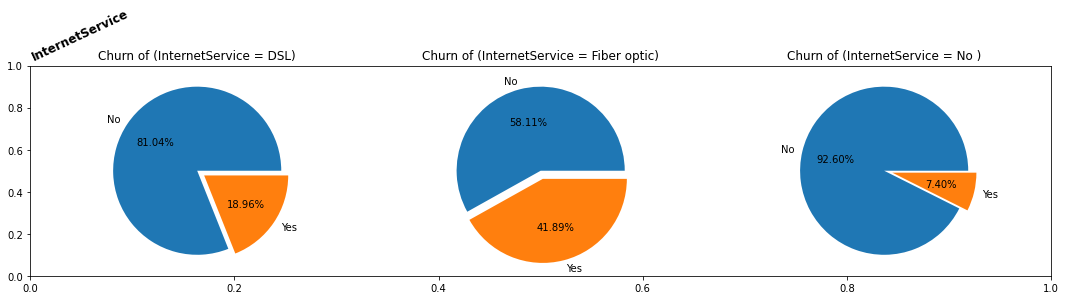

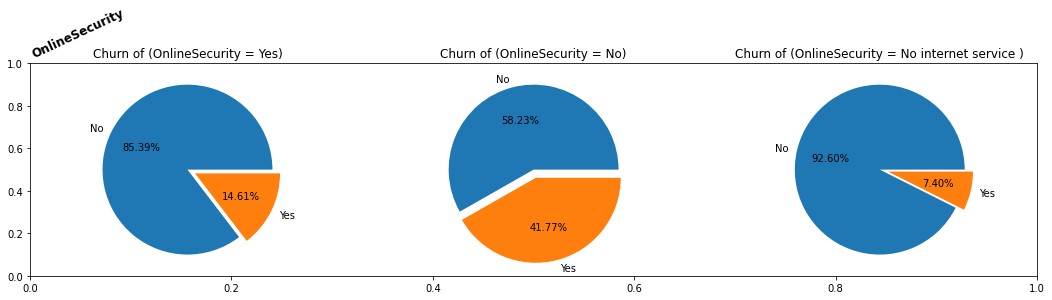

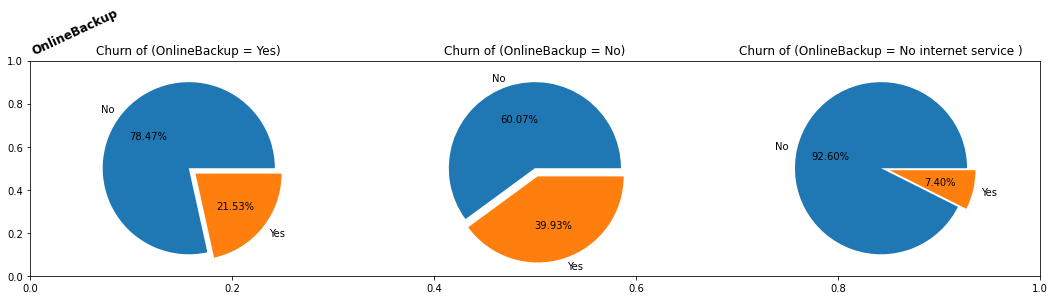

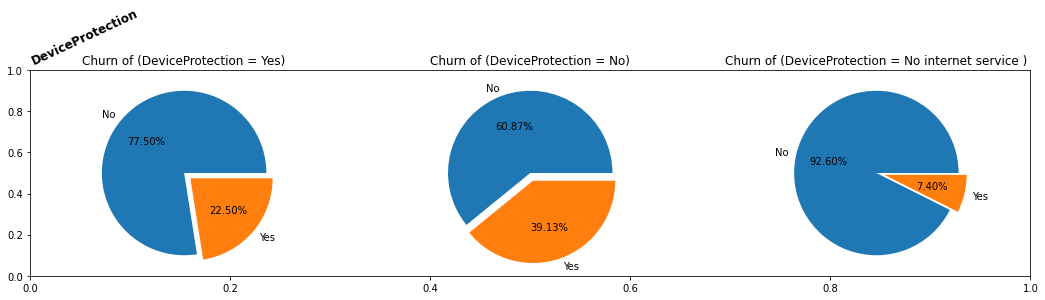

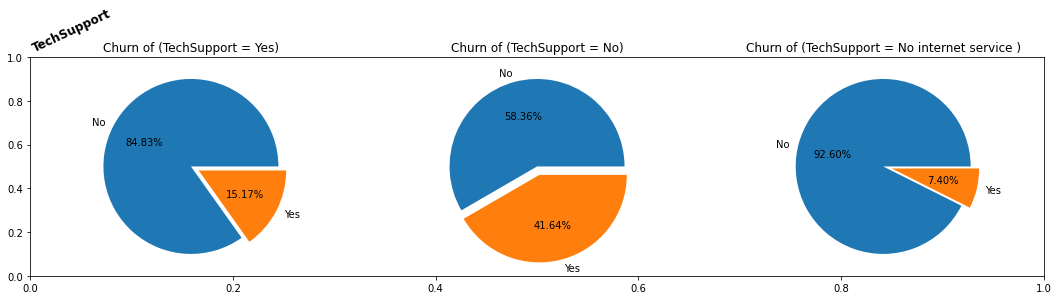

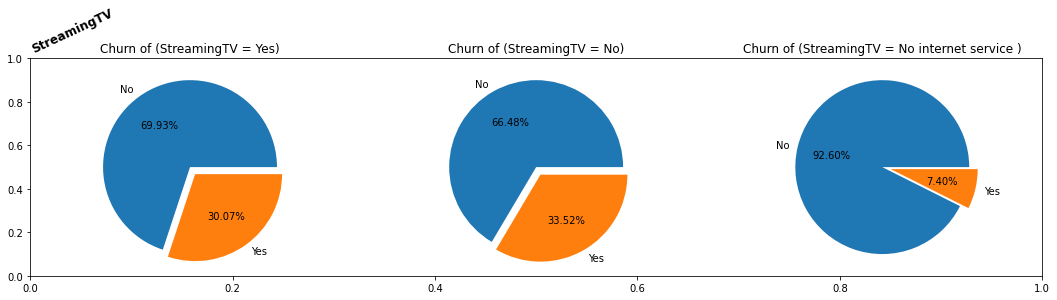

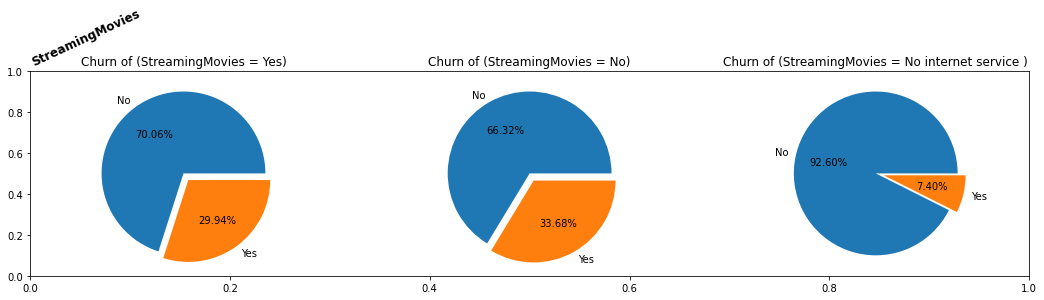

In [ ]:
pieChar = ['MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in pieChar:

    if i=='MultipleLines':
      a='Yes'
      b='No'
      service='No phone service'
    elif i=='InternetService':
      a='DSL'
      b='Fiber optic'
      service='No'
    else:
      a='Yes'
      b='No'
      service='No internet service'
    dataPie1 = data[data[i] == a]
    dataPie2 = data[data[i] == b]
    dataPie3 = data[data[i] == service]

    fig = plt.figure(figsize=(15,4.5)) 
    plt.title(i,rotation=25, loc="left",fontweight="bold")
    
    ax1 = fig.add_subplot(131)
    p1 = dataPie1['Churn'].value_counts()
    ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    
    ax1.set_title('Churn of (%s = %s)' %(i,a))

    ax2 = fig.add_subplot(132)
    p2 = dataPie2['Churn'].value_counts()
    ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    
    ax2.set_title('Churn of (%s = %s)' %(i,b))

    ax3 = fig.add_subplot(133)
    p3 = dataPie3['Churn'].value_counts()
    ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))   
    ax3.set_title('Churn of (%s = %s )' %(i,service))
  
    plt.tight_layout()   
    plt.show() 

**Finding**:

1.   For **Phone service**, the **service itself** or the **multipleLines** service **do not** significantly impact churn rate
2.   For **Internet service**, the service itself **do** significantly impact churn rate, and **Fiber optic, DSL, and no service** have churn rate from **high to low** respectively
3.   For **online security, online backup, online protection, and tech support** sercives, clients' churn rates are significantly **higher** if they **don't** have these services
4.   For **streaming TV** and **streaming Movies services**, having or not having these two services **does not** significantly impact churn rate



Let's now deal with **numerical characteristics**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


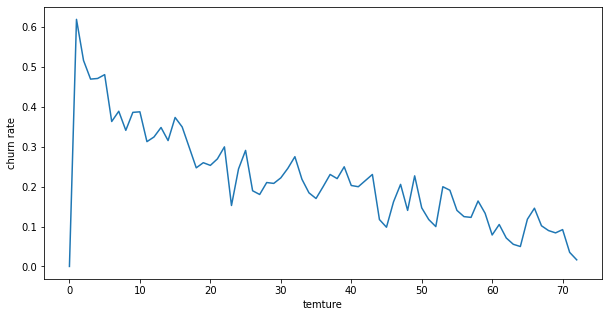

In [ ]:
#tenture to Churn rate
groupTenture = data[['tenure', 'Churn']]    
groupTenture['Churn'] = groupTenture['Churn'].map({'Yes': 1, 'No': 0})    
cRateTenture = groupTenture.groupby(['tenure']).sum() / groupTenture.groupby(['tenure']).count()    
cRateTenture = cRateTenture.reset_index()   

plt.figure(figsize=(10, 5))
plt.plot(cRateTenture['tenure'], cRateTenture['Churn'], label='Churn percentage')   
plt.xlabel('temture')
plt.ylabel('churn rate')
plt.show()

**Finding**: 
1. except for the clients just joined (tenture=0), churn rate **decrease** as **tenture increase**
2. for clients with **tenture longer than 2**, the churn rate **drops under 50%**. We can focus on this to 

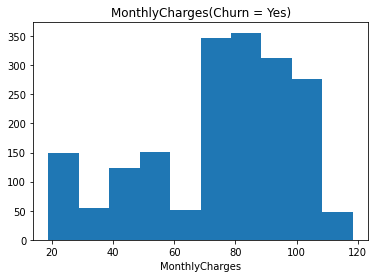

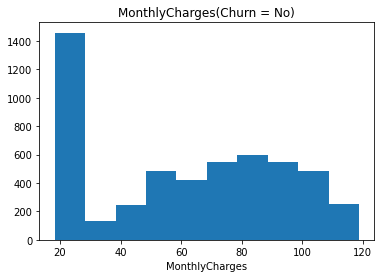

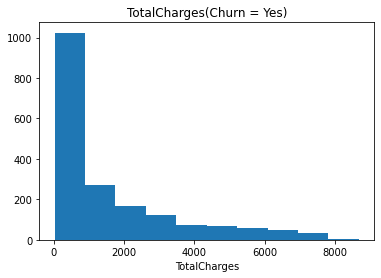

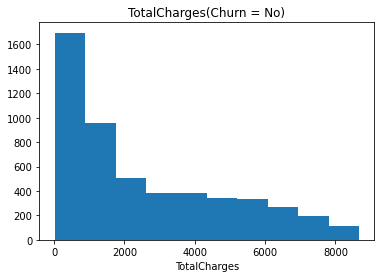

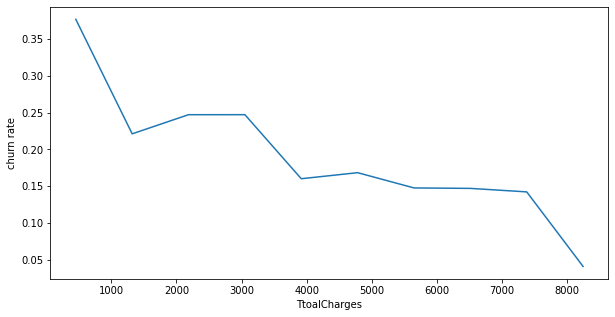

In [ ]:
# monthly charges to churn rate

tgtY=data[data['Churn']=='Yes']
tgtN=data[data['Churn']=='No']

plt.hist(tgtY['MonthlyCharges'])
plt.title('MonthlyCharges(Churn = Yes)')
plt.xlabel('MonthlyCharges')
plt.show()

plt.hist(tgtN['MonthlyCharges'])
plt.title('MonthlyCharges(Churn = No)')
plt.xlabel('MonthlyCharges')
plt.show()

#frequencyMY, binsMY = np.histogram(tgtY['MonthlyCharges'])
#frequencyMN, binsMN = np.histogram(tgtN['MonthlyCharges'])
#bins_w=(max(binsMY)-min(binsMY))/(len(binsMY)-1)
#x_axis=np.arange(min(binsMY)+bins_w/2,max(binsMY)+bins_w/2,bins_w).tolist()
#plt.figure(figsize=(10, 5))
#plt.plot(x_axis, frequencyMY/(frequencyMY+frequencyMN), label='Churn percentage')   
#plt.xlabel('MonthlyCharges')
#plt.ylabel('churn rate')
#plt.show()

plt.hist(tgtY['TotalCharges'])
plt.title('TotalCharges(Churn = Yes)')
plt.xlabel('TotalCharges')
plt.show()

plt.hist(tgtN['TotalCharges'])
plt.title('TotalCharges(Churn = No)')
plt.xlabel('TotalCharges')
plt.show() 

frequencyTY, binsTY = np.histogram(tgtY['TotalCharges'])
frequencyTN, binsTN = np.histogram(tgtN['TotalCharges'])
binsT_w=(max(binsTY)-min(binsTY))/(len(binsTY)-1)
xT_axis=np.arange(min(binsTY)+binsT_w/2,max(binsTY),binsT_w).tolist()
plt.figure(figsize=(10, 5))
plt.plot(xT_axis, frequencyTY/(frequencyTY+frequencyTN), label='Churn percentage')   
plt.xlabel('TtoalCharges')
plt.ylabel('churn rate')
plt.show()


**Finding**:

1. churn rate seems to **increase** with Monthly Charges **increases**
2. churn rate **decreases** with Total Charges **increases** 



**Current Finding Summary:**
1. customerID, gender, PhoneService, StreamingTV and StreamingMovies do not have significant impact on churn rate

## Model Building

In [ ]:
#drop columns that are insignificant
data_model=data.drop(['customerID', 'gender', 'PhoneService', 'StreamingTV', 'StreamingMovies'], axis=1)
data_backup=data_model
data_model.head(10)


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,0,No,No,8,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,0,No,Yes,22,Yes,Fiber optic,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,0,No,No,10,No phone service,DSL,Yes,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,0,Yes,No,28,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,0,No,Yes,62,No,DSL,Yes,Yes,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Deal with categorical charactaristics that do not have boolian values

In [ ]:
#MultipleLines

YesArray_MultipleLines=data_model['MultipleLines']=='Yes'
data_model['MultipleLines']=YesArray_MultipleLines
data_model['MultipleLines'] = data_model['MultipleLines'].map({True: 1, False: 0})


data_model['MultipleLines']
#YesArray_MultipleLines

0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    0
7041    1
7042    0
Name: MultipleLines, Length: 7043, dtype: int64

In [ ]:
#OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport
array_cols=['OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport']

for i in array_cols:

  YesArray_MultipleLines=data_model[i]=='Yes'
  data_model[i]=YesArray_MultipleLines
  data_model[i] = data_model[i].map({True: 1, False: 0})


In [ ]:
#for columns have value of categories
array_colNames=['InternetServiceDSL','InternetServiceFiberOptic','InternetServiceNo','ContractMonthToMonth','ContractOneYear','ContractTwoYear','PaymentMethodBankTransfer(automatic)','PaymentMethodElectronicCheck','PaymentMethodMailedCheck','PaymentMethodCreditCard(automatic)']

#internetService
DSLArray=data_model['InternetService']=='DSL'
FiberArray=data_model['InternetService']=='Fiber optic'
InternetNoArray=data_model['InternetService']=='No internet service'

#Contract
MTMArray=data_model['Contract']=='Month-to-month'
OneYearArray=data_model['Contract']=='One year'
TwoYearArray=data_model['Contract']=='Two year'

#PaymentMethod
BTArray=data_model['PaymentMethod']=='Bank transfer (automatic)	'
ECArray=data_model['PaymentMethod']=='Electronic check	'
MCArray=data_model['PaymentMethod']=='Mailed check	'
CCArray=data_model['PaymentMethod']=='Credit card (automatic)	'

d_temp = {'InternetServiceDSL': DSLArray, 'InternetServiceFiberOptic': FiberArray, 'InternetServiceNo': InternetNoArray, 'ContractMonthToMonth': MTMArray, 'ContractOneYear': OneYearArray, 'ContractTwoYear': TwoYearArray, 'PaymentMethodBankTransfer(automatic)': BTArray, 'PaymentMethodElectronicCheck': ECArray, 'PaymentMethodMailedCheck': MCArray, 'PaymentMethodCreditCard(automatic)': CCArray}
df_temp = pd.DataFrame(data=d_temp)
#df_temp

for i in array_colNames:
  j=0
  data_model.insert(len(data_model.columns)+j, i, d_temp[i])
  j=j+1

data_model=data_model.drop(['InternetService', 'Contract', 'PaymentMethod'], axis=1)
data_model


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetServiceDSL,InternetServiceFiberOptic,InternetServiceNo,ContractMonthToMonth,ContractOneYear,ContractTwoYear,PaymentMethodBankTransfer(automatic),PaymentMethodElectronicCheck,PaymentMethodMailedCheck,PaymentMethodCreditCard(automatic)
0,0,Yes,No,1,0,0,1,0,0,Yes,29.85,29.85,No,True,False,False,True,False,False,False,False,False,False
1,0,No,No,34,0,1,0,1,0,No,56.95,1889.50,No,True,False,False,False,True,False,False,False,False,False
2,0,No,No,2,0,1,1,0,0,Yes,53.85,108.15,Yes,True,False,False,True,False,False,False,False,False,False
3,0,No,No,45,0,1,0,1,1,No,42.30,1840.75,No,True,False,False,False,True,False,False,False,False,False
4,0,No,No,2,0,0,0,0,0,Yes,70.70,151.65,Yes,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,1,1,0,1,1,Yes,84.80,1990.50,No,True,False,False,False,True,False,False,False,False,False
7039,0,Yes,Yes,72,1,0,1,1,0,Yes,103.20,7362.90,No,False,True,False,False,True,False,False,False,False,False
7040,0,Yes,Yes,11,0,1,0,0,0,Yes,29.60,346.45,No,True,False,False,True,False,False,False,False,False,False
7041,1,Yes,No,4,1,0,0,0,0,Yes,74.40,306.60,Yes,False,True,False,True,False,False,False,False,False,False


In [ ]:
#change all yes/no and T/F to 1 and 0
changeCols=list(data_model.columns[1:13].drop(['tenure','MultipleLines','OnlineSecurity',	'OnlineBackup',	'DeviceProtection','TechSupport','MonthlyCharges','TotalCharges']))
for i in changeCols:
  data_model[i] = data_model[i].map({'Yes': 1, 'No': 0}) 

changeCols2=list(data_model.columns[13:22])
for i in changeCols2:
  data_model[i] = data_model[i].map({True: 1, False: 0})

data_model.head(10)


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetServiceDSL,InternetServiceFiberOptic,InternetServiceNo,ContractMonthToMonth,ContractOneYear,ContractTwoYear,PaymentMethodBankTransfer(automatic),PaymentMethodElectronicCheck,PaymentMethodMailedCheck,PaymentMethodCreditCard(automatic)
0,0,1,0,1,0,0,1,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,False
1,0,0,0,34,0,1,0,1,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,False
2,0,0,0,2,0,1,1,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,False
3,0,0,0,45,0,1,0,1,1,0,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,False
4,0,0,0,2,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,0,False
5,0,0,0,8,1,0,0,1,0,1,99.65,820.50,1,0,1,0,1,0,0,0,0,0,False
6,0,0,1,22,1,0,1,0,0,1,89.10,1949.40,0,0,1,0,1,0,0,0,0,0,False
7,0,0,0,10,0,1,0,0,0,0,29.75,301.90,0,1,0,0,1,0,0,0,0,0,False
8,0,1,0,28,1,0,0,1,1,1,104.80,3046.05,1,0,1,0,1,0,0,0,0,0,False
9,0,0,1,62,0,1,1,0,0,0,56.15,3487.95,0,1,0,0,0,1,0,0,0,0,False


In [ ]:
# Split data : X(feature) and y(target) 

X = np.array(data_model.drop(['Churn'],1))
y = np.array(data_model['Churn'])
np.shape(y)

(7043,)

No handles with labels found to put in legend.


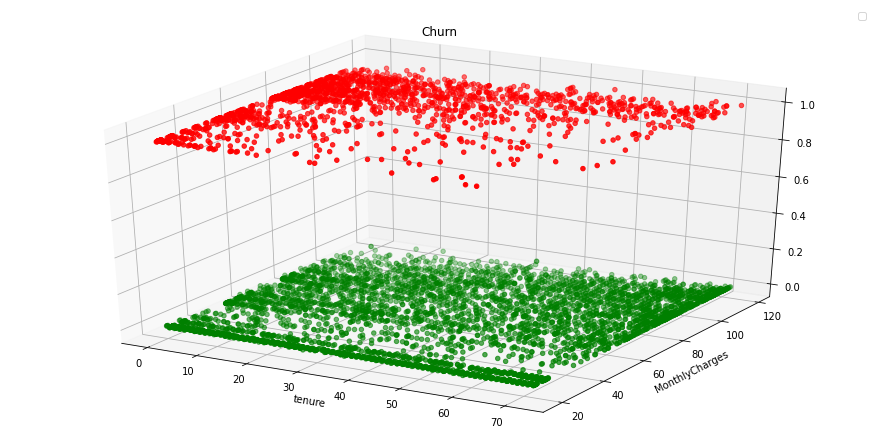

In [ ]:
# Visualization Data
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)
colors = {1:"r", 0:"g"}
ax.scatter(X[:,3], X[:,10],y, c=[colors[i] for i in y])
ax.set_xlabel("tenure")
ax.set_ylabel("MonthlyCharges")
plt.title("Churn")
ax.legend()
plt.show()

In [ ]:
# scaling each feature to a 0 to 1
X = minmax_scale(X)


##KNN

In [ ]:
# Create Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (5282, 22)
y_train (5282,)
X_test (1761, 22)
y_test (1761,)


In [ ]:
# Create k-NN classification model with GridSearchCV
# n_neighbors: Number of neighbors to use
# weights: weights is used for distance function (uniform: All points in each neighborhood are weighted equally ||
#                                                 distance: Weight points by the inverse of their distance.)
# p: Power parameter for calculate distance. (1: Manhattan Distance. 2: Eucledian Distance. 3 and upper: Minkowski Distance.)
knn_grid = {"n_neighbors":np.arange(1,10), "weights":["uniform", "distance"], "p":[1, 2, 3] }
knn = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=10, iid=False)
knn.fit(X_train, y_train)

print("k-NN Tuned Hyperparameters", knn.best_params_)
print("k-NN Tuned Best Score:", round(knn.best_score_,3))

k-NN Tuned Hyperparameters {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
k-NN Tuned Best Score: 0.779


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
# Use best classification model
best_clf_knn = knn.best_estimator_
best_clf_knn.fit(X_train, y_train)
knn_y_head = best_clf_knn.predict(X_test)
print("k-Nearest Neighbors (k-NN) Classification Accuracy: {}%" .format(round(best_clf_knn.score(X_test, y_test)*100,2)))

k-Nearest Neighbors (k-NN) Classification Accuracy: 78.19%


In [ ]:
# Functions

# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
# Showing Incorrect Classification
def plot_comp_test_data(X_test, y_test, y_head, title):
    plt.figure(figsize=(12,6))
    plt.scatter(X_test[:,0], X_test[:,6], c=[colors[i] for i in y_head], marker="*", s=60)
    n = np.size(y_head)
    for i in range(0, n):
        if y_head[i] != y_test[i]:
            plt.scatter(X_test[i,0], X_test[i,6], c=[colors[y_test[i]]], marker="X", s=120, alpha=.4)
    legend_elements = [Line2D([0], [0], marker='*', color='w', label='Prediction', markerfacecolor='k', markersize=14),
                       Line2D([0], [0], marker='X', color='w', label='Correct Class', markerfacecolor='k', markersize=12)]
    plt.legend(handles=legend_elements)
    plt.title(title)
    plt.show()

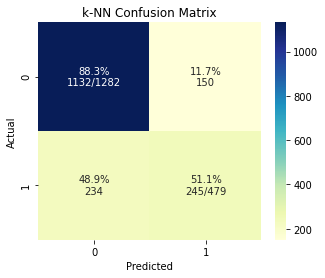

In [ ]:
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
# Show Confusion Matrix
plot_cm(y_test, knn_y_head, title="k-NN Confusion Matrix")

#DT

In [ ]:
# Create DT classification model with GridSearchCV
# criterion: The function to measure the quality of a split. (Gini: Gini impurity. || Entropy: Information gain)
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leafnode.
dtree_grid = {"criterion":["gini", "entropy"], "min_samples_split":[3,4,5,6,7,8,9,10], "min_samples_leaf":[1,2,3,4,5,6,7,8,9]}
dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), dtree_grid,cv=10, iid=False)
dtree.fit(X_train, y_train)
print("DT Tuned Hyperparameters", dtree.best_params_)
print("DT Tuned Best Score:", round(dtree.best_score_,3))


DT Tuned Hyperparameters {'criterion': 'gini', 'min_samples_leaf': 9, 'min_samples_split': 3}
DT Tuned Best Score: 0.774


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
# Use best classification model
best_clf_dt = dtree.best_estimator_
clf_dt = best_clf_dt.fit(X_train, y_train)
dtree_y_head = best_clf_dt.predict(X_test)
print("Decision Tree (DT) Classification Accuracy: {}%" .format(round(best_clf_dt.score(X_test, y_test)*100,2)))


Decision Tree (DT) Classification Accuracy: 76.09%


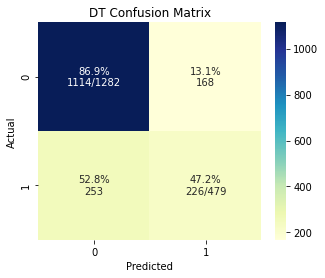

In [ ]:
# Show Confusion Matrix 
plot_cm(y_test, dtree_y_head, title="DT Confusion Matrix")


In [ ]:
# CV for DT (self-added code)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_dt = cross_val_score(clf_dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('DT CVV Accuracy: %.3f (%.3f)' % (np.mean(scores_dt), np.std(scores_dt)))


DT CVV Accuracy: 0.770 (0.011)


#RF

In [ ]:
# Create RF classification model with GridSearchCV
# n_estimators: The number of trees in the forest.
# criterion, min_samples_split and min_samples_leaf are same to decision tree parameters.
rf_grid = {"n_estimators": [50, 100, 150], "criterion": ["gini", "entropy"],
 "min_samples_split":[3,4,5], "min_samples_leaf":[5,6,7,]}
rforest = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=10, iid=False)
rforest.fit(X_train, y_train)
print("RF Tuned Hyperparameters", rforest.best_params_)
print("RF Tuned Best Score:", round(rforest.best_score_,3))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


RF Tuned Hyperparameters {'criterion': 'entropy', 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 150}
RF Tuned Best Score: 0.803


In [ ]:
best_clf_rforest = rforest.best_estimator_
clf_rf = best_clf_rforest.fit(X_train, y_train)
rforest_y_head = best_clf_rforest.predict(X_test)
print("Random Forest (RF) Classification Accuracy: {}%" .format(round(best_clf_rforest.score(X_test, y_test)*100,2)))

Random Forest (RF) Classification Accuracy: 80.12%


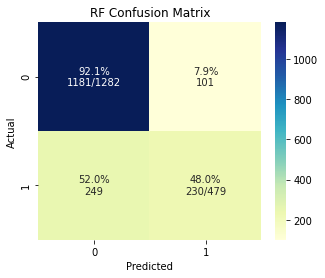

In [ ]:
 # Show Confusion Matrix
plot_cm(y_test, rforest_y_head, title="RF Confusion Matrix")


In [ ]:
# CV for RF (self-added code)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_rf = cross_val_score(clf_rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('RF CVV Accuracy: %.3f (%.3f)' % (np.mean(scores_rf), np.std(scores_rf)))

RF CVV Accuracy: 0.803 (0.011)


In [ ]:
 scores_rf


array([0.81689141, 0.79985806, 0.79134138, 0.82528409, 0.78409091,
       0.79630944, 0.8012775 , 0.79630944, 0.81392045, 0.79474432,
       0.80837473, 0.8133428 , 0.81547197, 0.79474432, 0.79190341])

## Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes (Self-added code)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
clf_gnb = gnb.fit(X_train, y_train)
gnb_y_head = clf_gnb.predict(X_test)
print("Gaussian Naive Bayes (GNB) Classification Accuracy: {}%" .format(round(gnb.score(X_test, y_test)*100,2)))

Gaussian Naive Bayes (GNB) Classification Accuracy: 71.66%


In [ ]:
# CV for GNB
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_gnb = cross_val_score(clf_gnb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('GNB CVV Accuracy: %.3f (%.3f)' % (np.mean(scores_gnb), np.std(scores_gnb)))


GNB CVV Accuracy: 0.708 (0.008)


In [ ]:
scores_gnb

array([0.71753016, 0.71327182, 0.71043293, 0.70596591, 0.69176136,
       0.71611072, 0.70546487, 0.69694819, 0.70738636, 0.71946023,
       0.7125621 , 0.69765791, 0.71611072, 0.70951705, 0.70596591])

In [ ]:
print("k-Nearest Neighbors (k-NN) Classification Accuracy: {}%" .format(round(best_clf_knn.score(X_test, y_test)*100,2)))
#print('KNN CVV Accuracy: %.3f (%.3f)' % (np.mean(scores_knn), np.std(scores_knn)))
print("Decision Tree (DT) Classification Accuracy: {}%" .format(round(best_clf_dt.score(X_test, y_test)*100,2)))
print('DT CVV Accuracy: %.3f (%.3f)' % (np.mean(scores_dt), np.std(scores_dt)))
print("Random Forest (RF) Classification Accuracy: {}%" .format(round(best_clf_rforest.score(X_test, y_test)*100,2)))
print('RF CVV Accuracy: %.3f (%.3f)' % (np.mean(scores_rf), np.std(scores_rf)))
print("Gaussian Naive Bayes (GNB) Classification Accuracy: {}%" .format(round(gnb.score(X_test, y_test)*100,2)))
print('GNB CVV Accuracy: %.3f (%.3f)' % (np.mean(scores_gnb), np.std(scores_gnb)))

k-Nearest Neighbors (k-NN) Classification Accuracy: 78.19%
Decision Tree (DT) Classification Accuracy: 76.09%
DT CVV Accuracy: 0.770 (0.011)
Random Forest (RF) Classification Accuracy: 80.12%
RF CVV Accuracy: 0.803 (0.011)
Gaussian Naive Bayes (GNB) Classification Accuracy: 71.66%
GNB CVV Accuracy: 0.708 (0.008)
